# Preparación de Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from IPython.display import display_html

In [2]:
# Carga los archivos de datos 

df = pd.read_csv('/home/dilcia/Documentos/games.csv')

In [3]:
# Imprime la información general

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Conversión y Limpieza da Datos

In [4]:
# Imprime una muestra de datos 

df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
# Convertir nombres de columnas en minisculas

df_colmuns = df.copy()

def clean(df_colmuns):

    new_column_names = []

    for column in df_colmuns.columns:
    
        minuscula = column.lower()
        new_column_names.append(minuscula)

    df_colmuns.columns =  new_column_names
    
    return df_colmuns

df_clean = clean(df_colmuns)
display(df_clean)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [6]:
# Verificando si hay valores nulos

df_clean.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
# Examinando los valores que componen a mi tabla rating, para verificar como tratar estos ausentes

rating_valores = df_clean['rating'].unique()

display(rating_valores)

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

**Entertainment Software Rating Board (ESRB)**

De acuerdo a la organización independiente en Estados Unidos que se encarga de asignar clasificaciones a los videojuegos y su contenido las clasificaciones que podemos encontrar son las siguientes:

- E (Everyone) : Apto para todos
- M : Apto para mayores de 17 años
- T: Apto para adolescentes (13 años y más)
- E10+ : Apto para personas de 10 años o más
- K-A: Apto para niños y adultos
- AO: : Solo para adultos (18 años y más)
- EC: Apto para la primera infancia.
- RP: Rating Pending (Clasificación pendiente)

**Comentario:** Rellenaremos con RP: Rating Pending (Clasificación pendiente) nuestros NaN

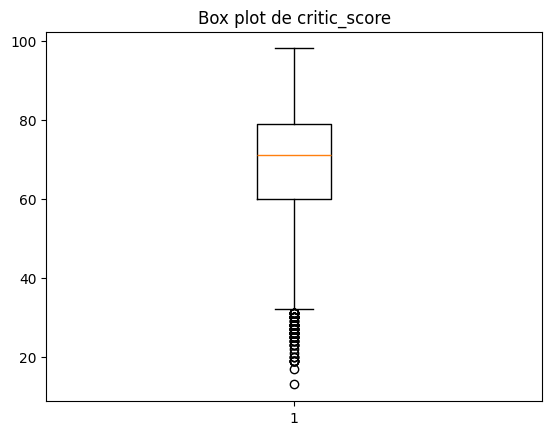

In [8]:
# Evaluar con un box plot el campo de critic_score, para determinar como rellenar los valores ausentes 

evaluar_ausentes_critic = df_clean[df_clean['critic_score'].notna()]

# Guardar en variable solo la columna con los valores que nos interesa para graficar

critic_score_notna = evaluar_ausentes_critic['critic_score']

# Realizar diagrama de box plot de critic_score

plt.boxplot(critic_score_notna)
plt.title('Box plot de critic_score')
plt.show()


**Comentario:** Encontramos valores atipicos, asi que rellenaremos con la mediana los NaN de la columna critic_score

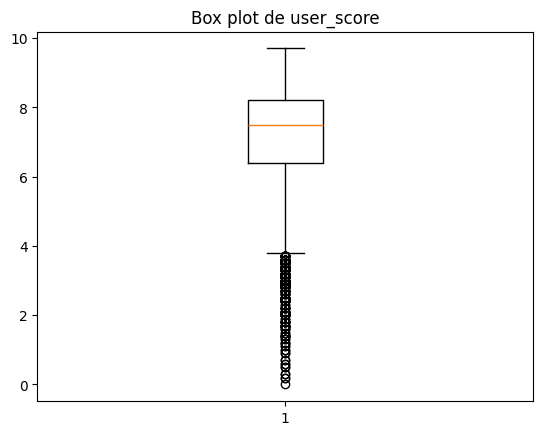

In [9]:
# Evaluar con un box plot el campo de user_score, para determinar como rellenar los valores ausentes 

# Filtrar nuestra columna user_score que no contega NaN y tbd 

filtro_notna_tbd_user =df_clean[df_clean['user_score'].notna() & ~(df_clean['user_score']=='tbd')].copy()

# Convertir a tipo numerico para para evaluar en nuestro box plot

filtro_notna_tbd_user['user_score'] = pd.to_numeric(filtro_notna_tbd_user['user_score'], errors='coerce')

# Forzar el tipo de dato

filtro_notna_tbd_user['user_score'] = filtro_notna_tbd_user['user_score'].astype('float')

# Guardar en variable solo la columna con los valores que nos interesa para graficar

user_score_notna = filtro_notna_tbd_user['user_score']

# Realizar diagrama de box plot de critic_score

plt.boxplot(user_score_notna)
plt.title('Box plot de user_score')
plt.show()


**Comentario:** Encontramos valores atipicos, asi que rellenaremos con la mediana los NaN de la columna user_score

In [10]:
# Rellenar ausentes NaN de la columna rating

clean_df = df_clean.copy()

clean_df['rating'] = clean_df['rating'].fillna('RP')

# Imprimir cambio realizado

rating_val_clean = clean_df['rating'].unique()

display(rating_val_clean)


array(['E', 'RP', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC'], dtype=object)

In [11]:
# Calcular mediana de la columna critic_score 

filtro_critic = clean_df[clean_df['critic_score'].notna()]

# Ordenar valores de mi campo critic_score

filtro_critic = filtro_critic['critic_score'].sort_values()

# Calcular la mediana

mediana_critic = filtro_critic.median()

print('Mediana de critic_score es:', mediana_critic)


Mediana de critic_score es: 71.0


In [12]:
# Calcular mediana de la columna user_score

# Ordenar valores de mi campo user_score

filtro_user = user_score_notna.sort_values()

# Calcular la mediana

mediana_user = filtro_user.median()

print('Mediana de user_score es:', mediana_user)


Mediana de user_score es: 7.5


In [13]:
# Rellenar ausentes NaN de la columna critic_score y user_score con las medianas calculadas para cada caso

df_games_clean = clean_df.copy()

df_games_clean['critic_score'] = df_games_clean['critic_score'].fillna(71.0)
df_games_clean['user_score'] = df_games_clean['user_score'].fillna(7.5)

df_games_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  object 
 10  rating           16715 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [14]:
# Rellenar los tbd user_score con la mediana que usamos para rellenar los NaN

df_games_clean['user_score'] = df_games_clean['user_score'].replace('tbd', 7.5)


In [15]:
# Calcular el porcentaje de valores ausentes

porcentaje_ausentes = df_games_clean['year_of_release'].isnull().mean() * 100

print(porcentaje_ausentes)

1.609332934489979


**Comentario:** Rellenaremos los ausentes de años de lanzamiento NaN con un valor de fecha frecuente, dado que el porcentaje de valores NaN
es realmente muy pequeño, no afecta el analisis de datos, solo rellenaremos con fechas aquellos nombres de videos juegos que contengan el  año en el mismo nombre.

Utilizaremos el año mas frecuente para mantener una integridad de datos, sin necesidad de introducir un sesgo significativo.

In [16]:
# Filtrar nombres que contienen un año en name (números de 4 dígitos)

filtro_nan_name = df_games_clean[df_games_clean['year_of_release'].isna() & (df_games_clean['name'].str.contains(r'\d{4}', na=False))]

display(filtro_nan_name)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,71.0,7.5,RP
1650,NASCAR Thunder 2003,PS2,NaN,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E
2572,PES 2009: Pro Evolution Soccer,PSP,NaN,Sports,0.04,0.33,0.26,0.17,71.0,7.5,RP
3486,Madden NFL 2002,XB,NaN,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E
4775,NFL GameDay 2003,PS2,NaN,Sports,0.20,0.15,0.00,0.05,60.0,7.5,E
5156,NBA Live 2003,XB,NaN,Sports,0.31,0.04,0.00,0.01,82.0,8.8,E
5336,Tomb Raider (2013),PC,NaN,Action,0.06,0.25,0.00,0.04,86.0,8.5,M
5655,All-Star Baseball 2005,PS2,NaN,Sports,0.16,0.12,0.00,0.04,72.0,8.6,E


In [17]:
df_games_clean_year = df_games_clean.copy()

data_year = {'Madden NFL 2004': 2004.0,
            'FIFA Soccer 2004': 2004.0,
            'wwe Smackdown vs. Raw 2006': 2006.0,
            'NASCAR Thunder 2003': 2003,
            'PES 2009: Pro Evolution Soccer': 2009.0,
            'Madden NFL 2002': 2002.0,
            'NFL GameDay 2003': 2003.0,
            'NBA Live 2003': 2003.0,
            'Tomb Raider (2013)': 2013.0,
            'All-Star Baseball 2005':2005.0, 
            'NBA Live 2003': 2003.0,
            'All-Star Baseball 2005': 2005.0,
            'Tour de France 2011': 2011.0,
            'Sega Rally 2006': 2006.0,
            'PDC World Championship Darts 2008': 2008.0,
            'Football Manager 2007': 2007.0,
            'PDC World Championship Darts 2008': 2008.0
            }

# Filtrar los índices donde 'year_of_release' es NaN y el nombre contiene un año

filtro_indices = df_games_clean_year.index[df_games_clean_year['year_of_release'].isna() & (df_games_clean_year['name'].str.contains(r'\d{4}', na=False))]

# Usamos .loc para asignar los valores del año usando el diccionario creado

df_games_clean_year.loc[filtro_indices, 'year_of_release'] = df_games_clean_year.loc[filtro_indices, 'name'].map(data_year)

# Impresion de muestra despues del reemplazo

filtro_name_year = df_games_clean_year[df_games_clean_year['name']=='PDC World Championship Darts 2008']

display(filtro_name_year)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6917,PDC World Championship Darts 2008,Wii,2008.0,Sports,0.02,0.21,0.0,0.01,51.0,5.4,E10+
15953,PDC World Championship Darts 2008,DS,2008.0,Sports,0.01,0.00,0.0,0.00,71.0,7.5,RP
16373,PDC World Championship Darts 2008,PSP,2008.0,Sports,0.01,0.00,0.0,0.00,43.0,7.5,E10+


In [18]:
# Contar ocurrencias y obtener el año más frecuente

año_mas_frecuente = df_games_clean['year_of_release'].value_counts().idxmax()

print("El año más frecuente es:", año_mas_frecuente)


El año más frecuente es: 2008.0


In [19]:
# Usaremos el año más frecuente para rellenar el restante de valores NaN de year_of_release

df_games_clean_fill = df_games_clean_year.copy()

df_games_clean_fill['year_of_release'] = df_games_clean_fill['year_of_release'].fillna(2008.0)

df_games_clean_fill.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  object 
 10  rating           16715 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Realizamos cambio en el tipo de datos de los siguientes campos:

- year_of_release a int 
- critic_score a float 
- user_score a float 

In [20]:
# Realizar cambio del tipo de dato

df_games_dtype = df_games_clean_fill.copy()

df_games_dtype['year_of_release'] = df_games_dtype['year_of_release'].astype('int')
df_games_dtype['user_score'] = df_games_dtype['user_score'].astype('float')

df_games_dtype.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [21]:
# Muestra de nuestro datos casi limpios

display(df_games_dtype)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,RP
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,RP
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,7.5,RP
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,71.0,7.5,RP
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,7.5,RP
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,71.0,7.5,RP


In [22]:
# Evaluando los las 2 filas con NaN

df_games = df_games_dtype.copy()

ausentes_name = df_games[df_games_clean['genre'].isna()]

display(ausentes_name)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,71.0,7.5,RP
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,71.0,7.5,RP


In [23]:
# Rellenaremos con Unknown

df_games['name'] = df_games['name'].fillna('Unknown')
df_games['genre'] = df_games['genre'].fillna('Unknown')

df_games.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


# Conclusiones de Conversión y Limpieza de Datos

# Calculo de Ventas Totales

In [24]:
# Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

df_games_sales = df_games.copy()

df_games_sales['total_sales'] = df_games_sales['na_sales'] + df_games_sales['eu_sales'] +  df_games_sales['jp_sales']

display(df_games_sales)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,RP,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,RP,30.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,7.5,RP,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,71.0,7.5,RP,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,7.5,RP,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,71.0,7.5,RP,0.01


# Análisis de Datos

#### 1.1. Juegos que fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

In [25]:
# Realizamos un groupby por nombre de los juegos, años y calcular la cantidad de juegos por videojuegos

filtro_cant_games = df_games_sales.groupby('year_of_release')['name'].count().reset_index(name='total_games')

display(filtro_cant_games.head())

,year_of_release,total_games
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14


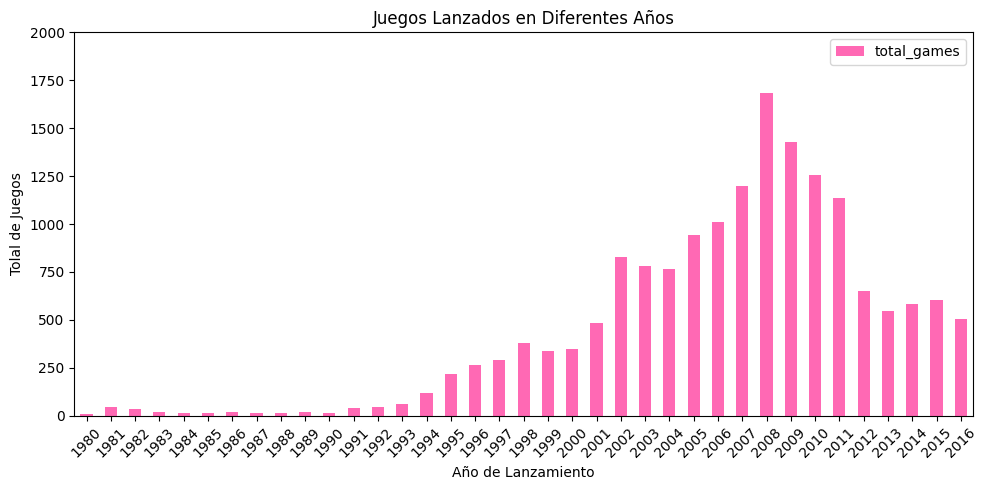

In [26]:
filtro_cant_games.plot(kind='bar', x='year_of_release', color='hotpink', figsize=(10, 5))

# Añadir títulos y etiquetas
plt.title('Juegos Lanzados en Diferentes Años')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Tolal de Juegos')

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño
plt.ylim(0,2000)
plt.show()

#### 1.2 Plataforma con mayores ventas basado en los  en los datos de cada año

In [27]:
# Agrupar por plataforma y año de lanzamiento

platform_sales = df_games_sales.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index(name='total_sales')

display(platform_sales)

,platform,year_of_release,total_sales
0,2600,1980,11.26
1,2600,1981,35.36
2,2600,1982,28.57
3,2600,1983,5.78
4,2600,1984,0.27
...,...,...,...
241,XB,2008,5.06
242,XOne,2013,17.21
243,XOne,2014,49.26
244,XOne,2015,54.67


In [28]:
# Realizar suma total de las ventas de las plataformas basado en los datos de cada año

df_max_sales =  platform_sales.groupby('platform', as_index=False)['total_sales'].sum()

display(df_max_sales)


,platform,total_sales
0,2600,96.07
1,3DO,0.10
2,3DS,245.64
3,DC,15.68
4,DS,746.86
5,GB,247.26
6,GBA,310.12
7,GC,193.75
8,GEN,29.80
9,GG,0.04


#### Las 10 Plataformas con más ventas

In [29]:
filtro_plat = df_max_sales.nlargest(10,'total_sales').reset_index(drop=True)

display(filtro_plat)

,platform,total_sales
0,PS2,1062.33
1,X360,885.66
2,Wii,828.44
3,PS3,803.97
4,DS,746.86
5,PS,689.95
6,GBA,310.12
7,PS4,265.79
8,PSP,252.63
9,XB,249.02


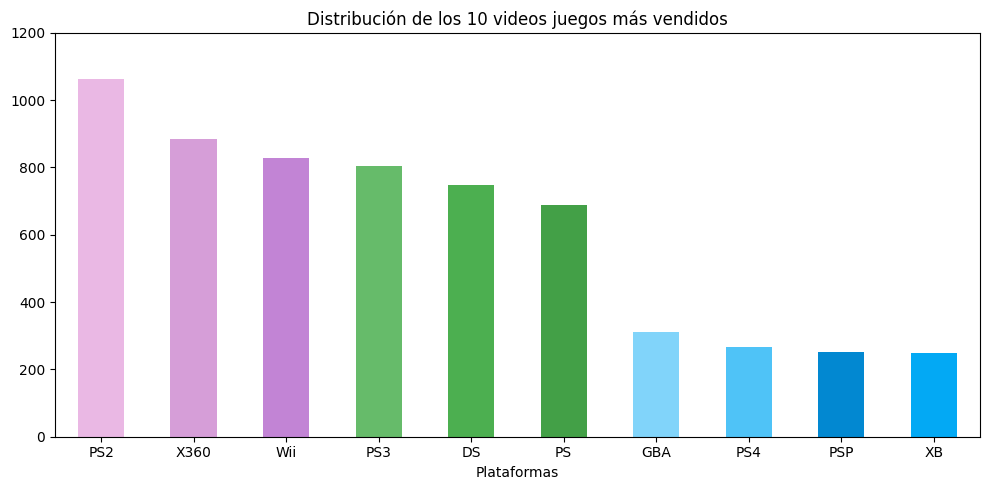

In [30]:
colors = ['#EAB8E4',  # Morado claro
          '#D69ED8',  # Morado pastel
          '#C284D5',  # Morado suave
          '#66BB6A',  # Verde medio
          '#4CAF50',  # Verde brillante
          '#43A047',  # Verde intermedio
          '#81D4FA',  # Azul suave
          '#4FC3F7',  # Azul medio
          '#0288D1',  # Azul oscuro
          '#03A9F4',  # Azul intermedio
]

filtro_plat.plot(kind='bar', x='platform', y='total_sales', color=colors, figsize=(10, 5),legend=False)

# Añadir títulos y etiqueta

plt.title('Distribución de los 10 videos juegos más vendidos')
plt.xlabel('Plataformas')

# Mostrar el gráfico

plt.xticks(rotation=0)  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño
plt.ylim(0,1200)

plt.show()

In [31]:
# Para cada plataforma, el año donde tuvieron mayores ventas

df_max_sales = platform_sales.loc[platform_sales.groupby('platform')['total_sales'].idxmax()].reset_index(drop=True)

display(df_max_sales)


,platform,year_of_release,total_sales
0,2600,1981,35.36
1,3DO,1995,0.08
2,3DS,2011,58.80
3,DC,2000,5.86
4,DS,2008,137.49
5,GB,1989,63.57
6,GBA,2004,76.10
7,GC,2002,50.48
8,GEN,1992,12.27
9,GG,1992,0.04


,platform,year_of_release,total_sales
0,GB,1989,63.57
1,PS,1998,160.44
2,PS2,2002,183.66
3,GBA,2004,76.10
4,XB,2004,63.29
5,DS,2008,137.49
6,Wii,2009,189.43
7,X360,2010,155.80
8,PS3,2011,135.22
9,PS4,2015,100.44


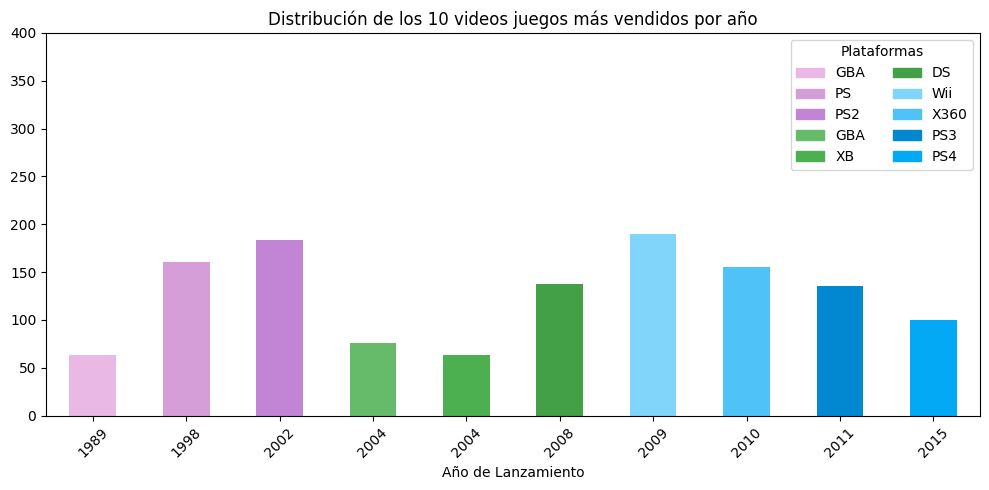

In [32]:
# Filtrar las 10 Plataformas con más ventas

filtro_plat = df_max_sales.nlargest(10,'total_sales').sort_values(by='year_of_release').reset_index(drop=True)

display(filtro_plat)

# Realizar gráfica de las 10 Plataformas con más  ventas

colors = ['#EAB8E4',  # Morado claro
          '#D69ED8',  # Morado pastel
          '#C284D5',  # Morado suave
          '#66BB6A',  # Verde medio
          '#4CAF50',  # Verde brillante
          '#43A047',  # Verde intermedio
          '#81D4FA',  # Azul suave
          '#4FC3F7',  # Azul medio
          '#0288D1',  # Azul oscuro
          '#03A9F4',  # Azul intermedio
]

filtro_plat.plot(kind='bar', x='year_of_release', y='total_sales', color=colors, figsize=(10, 5),legend=False)

# Añadir títulos y etiqueta

plt.title('Distribución de los 10 videos juegos más vendidos por año')
plt.xlabel('Año de Lanzamiento')

# Mostrar el gráfico

plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño
plt.ylim(0,400)


# Crear la leyenda manualmente utilizando patches
legend_handles = [mpatches.Patch(color=colors[i], label=label) for i, label in enumerate(['GBA', 'PS', 'PS2', 'GBA', 'XB', 'DS', 'Wii', 'X360', 'PS3', 'PS4'])]

# Asignar la leyenda
plt.legend(title='Plataformas', handles=legend_handles, loc='upper right', ncol=2, fontsize=10)

plt.show()

#### 1.2 Las Plataformas antiguas con más ventas en los primeros 13 años 

In [33]:
nunique_year =  platform_sales['year_of_release'].nunique()
print(nunique_year)

37


**Comentario:** Para establecer una referencia de antigüedad en el análisis, podríamos dividir los 37 años de datos en períodos históricos, considerando las plataformas antiguas como aquellas cuya fecha de lanzamiento está en el tercio inicial del rango. Esto sugiere que podríamos considerar como “plataformas antiguas”, aquellas que fueron lanzadas en los primeros 12-13 años.
Por ejemplo:

- Antiguas: Primeros 12-13 años.
- Intermedias: Siguientes 12 años.
- Modernas: Últimos 12-13 años.

In [34]:
# Filtramos los primeros 13 años de video juegos

platform_sales_fil =  platform_sales[(platform_sales['year_of_release']>=1980) & (platform_sales['year_of_release']<=1993)]

platform_sales_fil = platform_sales_fil.sort_values(by=['platform', 'year_of_release'])

display(platform_sales_fil)

,platform,year_of_release,total_sales
0,2600,1980,11.26
1,2600,1981,35.36
2,2600,1982,28.57
3,2600,1983,5.78
4,2600,1984,0.27
5,2600,1985,0.45
6,2600,1986,0.67
7,2600,1987,1.93
8,2600,1988,0.73
9,2600,1989,0.62


In [35]:
# Listado de Plataformas antiguas

platform_unique_old = platform_sales_fil['platform'].unique()
print(platform_unique_old)

['2600' 'DS' 'GB' 'GEN' 'GG' 'NES' 'NG' 'PC' 'SCD' 'SNES']


In [36]:
# Para cada plataforma, seleccionar el año con mayores ventas

df_max_sales_previus = platform_sales_fil.loc[platform_sales_fil.groupby('platform')['total_sales'].idxmax()].reset_index(drop=True)

display(df_max_sales_previus)


,platform,year_of_release,total_sales
0,2600,1981,35.36
1,DS,1985,0.02
2,GB,1989,63.57
3,GEN,1992,12.27
4,GG,1992,0.04
5,NES,1985,52.53
6,NG,1993,0.21
7,PC,1992,2.92
8,SCD,1993,1.45
9,SNES,1993,39.24


**Comentario:** Teniendo las plataformas con mayores ventas, buscaremos el primer año de lanzamiento de cada plataforma y luego la ultimo año
de lanzamiento de esa plataforma, de esta manera obtener cuanto han tardado en desaparecer plataformas antiguas.

In [37]:
# Primer año de lanzamiento para cada plataforma

firts_release_old =  platform_sales_fil.loc[platform_sales_fil.groupby('platform')['year_of_release'].idxmin(),['platform','year_of_release', 'total_sales']].reset_index(drop=True)

# Renombrar la columna year_of_release a first_release_old

firts_release_old = firts_release_old.rename(columns={'year_of_release': 'firts_release_old','total_sales': 'total_firts_old'})

display(firts_release_old)

,platform,firts_release_old,total_firts_old
0,2600,1980,11.26
1,DS,1985,0.02
2,GB,1988,1.40
3,GEN,1990,2.52
4,GG,1992,0.04
5,NES,1983,10.88
6,NG,1993,0.21
7,PC,1985,0.03
8,SCD,1993,1.45
9,SNES,1990,25.48


In [38]:
# Ultimo año de lanzamiento hasta la fecha 

second_release_old = platform_sales.loc[platform_sales.groupby('platform')['year_of_release'].idxmax(),['platform','year_of_release', 'total_sales']].reset_index(drop=True)

# Renombrar la columna year_of_release a first_release_old

second_release_old = second_release_old.rename(columns={'year_of_release': 'second_release_old','total_sales': 'total_second_old'})

display(second_release_old)

,platform,second_release_old,total_second_old
0,2600,2008,10.43
1,3DO,1995,0.08
2,3DS,2016,14.50
3,DC,2008,0.04
4,DS,2013,1.42
5,GB,2008,0.99
6,GBA,2008,4.85
7,GC,2008,1.86
8,GEN,1994,7.82
9,GG,1992,0.04


In [39]:
# Hacer una union de ambas tablas, para tener nuestras “Plataformas Antiguas”

merge_platform = pd.merge(firts_release_old, second_release_old, on=('platform'), how='inner')

# Realizar resta del ultimo año de lanzamiento con el primero año de lanzamiento, para conocer la cantidad de años transcurridos entre un
# nuevo lanzamiento y otro

merge_platform['duration_old'] = merge_platform['second_release_old'] - merge_platform['firts_release_old'] 

display(merge_platform)


,platform,firts_release_old,total_firts_old,second_release_old,total_second_old,duration_old
0,2600,1980,11.26,2008,10.43,28
1,DS,1985,0.02,2013,1.42,28
2,GB,1988,1.40,2008,0.99,20
3,GEN,1990,2.52,1994,7.82,4
4,GG,1992,0.04,1992,0.04,0
5,NES,1983,10.88,1994,0.11,11
6,NG,1993,0.21,1996,0.10,3
7,PC,1985,0.03,2016,4.89,31
8,SCD,1993,1.45,1994,0.36,1
9,SNES,1990,25.48,1999,0.26,9


#### 1.4  Buscar las plataformas que solían ser populares pero que ahora no tienen ventas


**Comentario:** Ya con la tabla que tenemos solo filtramos las plataformas que sean a menores a 2003. Pudiendo saber las plataformas que del 2003 en adelante no siguieron generando ventas. Ya que para nuestro estudio, establecimos que nuestra plataformas modernas, se encuentran de 2003 en adelante.

In [40]:
filtro_plat_sales_old = merge_platform[(merge_platform['second_release_old']<=2003)].reset_index(drop=True)

# Conocer el tiempo promedio en el mercado de estas plataformas

platform_sort_old = filtro_plat_sales_old['duration_old'].sort_values()

mean_platform_old = platform_sort_old.mean()

display(filtro_plat_sales_old)

print('Tiempo promedio de duración en el mercado de plataformas antiguas:',mean_platform_old.round(2))

,platform,firts_release_old,total_firts_old,second_release_old,total_second_old,duration_old
0,GEN,1990,2.52,1994,7.82,4
1,GG,1992,0.04,1992,0.04,0
2,NES,1983,10.88,1994,0.11,11
3,NG,1993,0.21,1996,0.10,3
4,SCD,1993,1.45,1994,0.36,1
5,SNES,1990,25.48,1999,0.26,9


Tiempo promedio de duración en el mercado de plataformas antiguas: 4.67


**Comentario:** Las plataformas que anteriormente eran muy populares en ventas y ya no generan ventas, tenemos a **GEN, GG, NES, NG, SCD Y SNES**. Tambien podemos responder que tiempo que tardan en desaparecer estas plataformas es de 4 años.

#### 1.5 Plataformas modernas con más ventas en los ultimos de 13 años

In [41]:
# Excluir plataformas antiguas que siguen vigentes, solo nos interesa las plataformas modernas

platform_unique_old

df_filtrado_new = platform_sales[~platform_sales['platform'].isin(platform_unique_old)]

display(df_filtrado_new)


,platform,year_of_release,total_sales
11,3DO,1994,0.02
12,3DO,1995,0.08
13,3DS,2008,1.10
14,3DS,2011,58.80
15,3DS,2012,48.77
...,...,...,...
241,XB,2008,5.06
242,XOne,2013,17.21
243,XOne,2014,49.26
244,XOne,2015,54.67


In [42]:
# Filtramos los ultimos 13 años de video juegos, excluyendo a las plataformas antiguas que siguen vigente

platform_sales_modern =  df_filtrado_new[(df_filtrado_new['year_of_release']>=2003) & (df_filtrado_new['year_of_release']<=2016)]

# Para cada plataforma, seleccionar el año con mayores ventas

df_max_sales_modern = platform_sales_modern.loc[platform_sales_modern.groupby('platform')['total_sales'].idxmax()].reset_index(drop=True)

display(df_max_sales_modern)


,platform,year_of_release,total_sales
0,3DS,2011,58.80
1,DC,2008,0.04
2,GBA,2004,76.10
3,GC,2003,49.59
4,N64,2008,0.60
5,PS,2008,3.06
6,PS2,2004,179.48
7,PS3,2011,135.22
8,PS4,2015,100.44
9,PSP,2006,46.35


In [43]:
# Primer año de lanzamiento para cada plataforma

firts_release_modern = df_games_sales.loc[df_games_sales.groupby('platform')['year_of_release'].idxmin(),['platform','year_of_release', 'total_sales']].reset_index(drop=True)

# Renombrar la columna year_of_release 

firts_release_modern = firts_release_modern.rename(columns={'year_of_release': 'firts_release_modern','total_sales': 'total_firts_modern'})

# Ultimo año de lanzamiento

second_release_modern = df_games_sales.loc[df_games_sales.groupby('platform')['year_of_release'].idxmax(),['platform','year_of_release', 'total_sales']].reset_index(drop=True)

# Renombrar la columna year_of_release 

second_release_modern = second_release_modern.rename(columns={'year_of_release': 'second_release_modern','total_sales': 'total_second_modern'})


In [44]:
# Hacer una union de ambas tablas, para tener nuestras “Plataformas Modernas”

merge_platform_modern = pd.merge(firts_release_modern, second_release_modern, on=('platform'), how='inner')

# Realizar resta del ultimo año de lanzamiento con el primero año de lanzamiento, para conocer la cantidad de años transcurridos entre un
# nuevo lanzamiento y otro

merge_platform_modern['duration_modern'] = merge_platform_modern['second_release_modern'] - merge_platform_modern['firts_release_modern'] 

# Excluir nuevamente plataformas antiguas que siguen vigentes, solo nos interesa las plataformas modernas

filtrado_new_plat = merge_platform_modern[~merge_platform_modern['platform'].isin(platform_unique_old)].reset_index(drop=True)

display(filtrado_new_plat)

,platform,firts_release_modern,total_firts_modern,second_release_modern,total_second_modern,duration_modern
0,3DO,1994,0.02,1995,0.06,1
1,3DS,2008,0.37,2016,6.69,8
2,DC,1998,2.33,2008,0.04,10
3,GBA,2000,0.07,2008,2.33,8
4,GC,2001,6.84,2008,0.52,7
5,N64,1996,11.67,2008,0.29,12
6,PCFX,1996,0.03,1996,0.03,0
7,PS,1994,1.18,2008,1.36,14
8,PS2,2000,3.70,2011,0.11,11
9,PS3,2006,3.60,2016,0.63,10


In [45]:
# Conocer el tiempo promedio de lanzamiento

merge_platform_modern_sort = filtrado_new_plat['duration_modern'].sort_values()

mean_platform_modern = merge_platform_modern_sort.mean()

print('Tiempo promedio de duración en el mercado de plataformas modernas:',mean_platform_modern.round(2))

Tiempo promedio de duración en el mercado de plataformas modernas: 6.95


#### 1.6 ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

- Las plataformas modernas tardan 7 años en aparecer 
- Las platadormas antiguas tardan 5 años en desaparecer

#### 1.7 ¿Qué plataformas son líderes en ventas? Elige varias plataformas potencialmente rentables.

Basada en nuestras plaformas que siguen vigentes en los ultimos 13 años, sin excluir ninguna. Simplemente todas las plataformas que sigue generando ventas, incluidas plataformas antiguas que siguieron generando ventas. Inicialmente teniamos un rango mucho más amplio de plataformas, ya que evaluavamos todo el rango de  años de lanzamiento. Pero para el mercado más actual, es eficiente estudiar el rango de las plataformas que siguen vigente en la actualidad, en los ultimos 13 años, poder obtener plataformas líderes.

In [46]:
platform_modern_sales =  df_games_sales[(df_games_sales['year_of_release']>=2003) & (df_games_sales['year_of_release']<=2016)]

groupby_platform_modern_sales = platform_modern_sales.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()

display(groupby_platform_modern_sales)

,platform,year_of_release,total_sales
0,2600,2008,10.43
1,3DS,2008,1.10
2,3DS,2011,58.80
3,3DS,2012,48.77
4,3DS,2013,53.97
...,...,...,...
126,XB,2008,5.06
127,XOne,2013,17.21
128,XOne,2014,49.26
129,XOne,2015,54.67


In [47]:
# Realizar agrupacion nuevamente por plataforma, para calcular total de ventas por cada  año

groupby_lider_platform = groupby_platform_modern_sales.groupby('platform', as_index=False)['total_sales'].sum().sort_values(by='total_sales', ascending=False).reset_index(drop=True)

display(groupby_lider_platform)

,platform,total_sales
0,X360,885.66
1,Wii,828.44
2,PS3,803.97
3,DS,746.84
4,PS2,693.43
5,PS4,265.79
6,PSP,252.63
7,3DS,245.64
8,XB,179.57
9,GBA,178.08


In [48]:
# Filtrar las 10 plataformas líderes

lideres_plat = groupby_lider_platform.nlargest(10,'total_sales').reset_index(drop=True)

display(lideres_plat)

print()

# Guardar en forma de array 

lideres_platform = lideres_plat['platform'].values

display(lideres_platform)

,platform,total_sales
0,X360,885.66
1,Wii,828.44
2,PS3,803.97
3,DS,746.84
4,PS2,693.43
5,PS4,265.79
6,PSP,252.63
7,3DS,245.64
8,XB,179.57
9,GBA,178.08


array(['X360', 'Wii', 'PS3', 'DS', 'PS2', 'PS4', 'PSP', '3DS', 'XB',
       'GBA'], dtype=object)

#### 1.8 ¿Cuáles crecen y cuáles se reducen?

In [49]:
# Calculamos cambio porcentual 

platform_modern_sales_groupby = groupby_platform_modern_sales.copy()

platform_modern_sales_groupby['growth_rate']=  platform_modern_sales_groupby.groupby('platform')['total_sales'].pct_change()

display(platform_modern_sales_groupby)



,platform,year_of_release,total_sales,growth_rate
0,2600,2008,10.43,NaN
1,3DS,2008,1.10,NaN
2,3DS,2011,58.80,52.454545
3,3DS,2012,48.77,-0.170578
4,3DS,2013,53.97,0.106623
...,...,...,...,...
126,XB,2008,5.06,8.547170
127,XOne,2013,17.21,NaN
128,XOne,2014,49.26,1.862289
129,XOne,2015,54.67,0.109825


In [50]:
# Filtramos el cambio porcentual para nuestras plataformas  líderes 'X360', 'Wii', 'PS3', 'DS', 'PS2', 'PS4', 'PSP', '3DS', 'XB','GBA'

filtrado_growth_rate = platform_modern_sales_groupby[platform_modern_sales_groupby['platform'].isin(lideres_platform)]

display(filtrado_growth_rate)


,platform,year_of_release,total_sales,growth_rate
1,3DS,2008,1.10,NaN
2,3DS,2011,58.80,52.454545
3,3DS,2012,48.77,-0.170578
4,3DS,2013,53.97,0.106623
5,3DS,2014,41.75,-0.226422
...,...,...,...,...
122,XB,2004,63.29,0.183433
123,XB,2005,47.49,-0.249644
124,XB,2006,9.72,-0.795325
125,XB,2007,0.53,-0.945473


In [122]:
filtrado_growth_rate_x360 = filtrado_growth_rate[filtrado_growth_rate['platform']=='X360']
filtrado_growth_rate_wii = filtrado_growth_rate[filtrado_growth_rate['platform']=='Wii']
filtrado_growth_rate_ps3 = filtrado_growth_rate[filtrado_growth_rate['platform']=='PS3']
filtrado_growth_rate_ds = filtrado_growth_rate[filtrado_growth_rate['platform']=='DS']
filtrado_growth_rate_ps2 = filtrado_growth_rate[filtrado_growth_rate['platform']=='PS2']
filtrado_growth_rate_ps4 = filtrado_growth_rate[filtrado_growth_rate['platform']=='PS4']
filtrado_growth_rate_psp = filtrado_growth_rate[filtrado_growth_rate['platform']=='PSP']
filtrado_growth_rate_3ds = filtrado_growth_rate[filtrado_growth_rate['platform']=='3DS']
filtrado_growth_rate_xb = filtrado_growth_rate[filtrado_growth_rate['platform']=='XB']
filtrado_growth_rate_gba = filtrado_growth_rate[filtrado_growth_rate['platform']=='GBA']

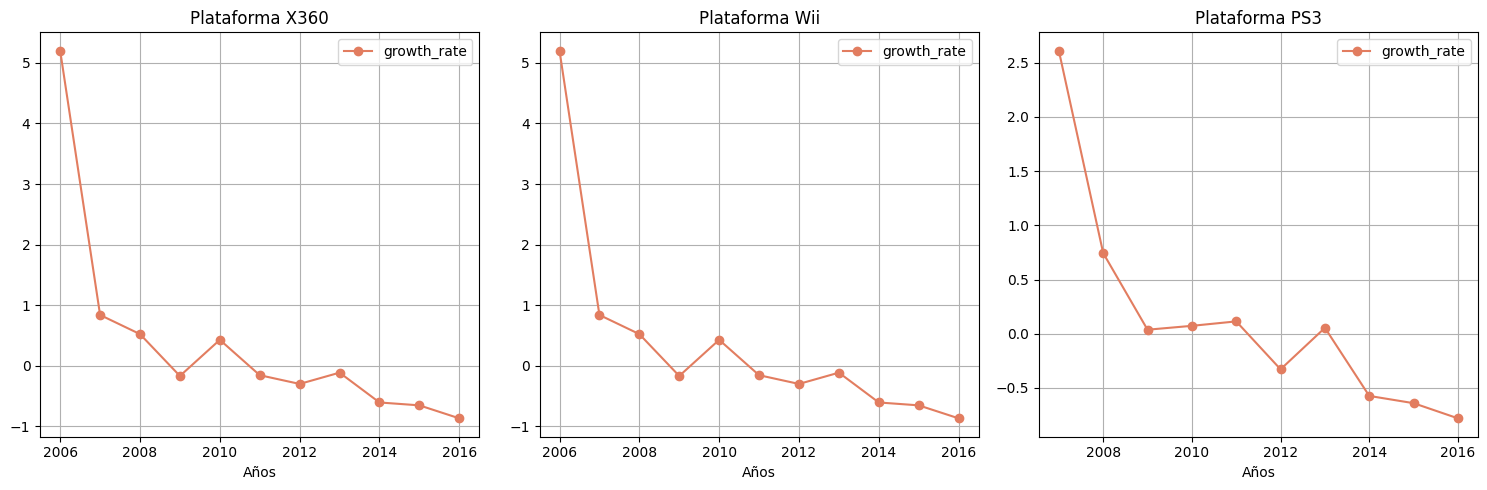

In [124]:
# Crear la figura y los ejes

colors = [
    '#E27D60',  # Coral
    '#C38D9E',  # Rosa suave
    '#E74C3C',  # Rojo vibrante
    '#F39C12',  # Naranja
    '#8E44AD',  # Morado profundo
    '#2980B9',  # Azul intenso
    '#BDC3C7',  # Gris claro
]

# Crear una figura con dos ejes (subplots)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))  

# Primer gráfico de línea de plataformas en crecimiento o en disminución

filtrado_growth_rate_x360.plot(x='year_of_release', y='growth_rate', kind='line', color=colors, marker='o', ax=axs[0])
axs[0].set_title('Plataforma X360')
axs[0].set_xlabel('Años')
axs[0].grid(True)


# Segundo gráfico de línea de plataformas en crecimiento o en disminución

filtrado_growth_rate_x360.plot(x='year_of_release', y='growth_rate', kind='line', color=colors, marker='o', ax=axs[1])
axs[1].set_title('Plataforma Wii')
axs[1].set_xlabel('Años')
axs[1].grid(True)

# Tercer gráfico de línea de plataformas en crecimiento o en disminución

filtrado_growth_rate_ps3.plot(x='year_of_release', y='growth_rate', kind='line', color=colors, marker='o', ax=axs[2])
axs[2].set_title('Plataforma PS3')
axs[2].set_xlabel('Años')
axs[2].grid(True)

# gráfico de línea de plataformas en crecimiento o en disminución

filtrado_growth_rate_ps3.plot(x='year_of_release', y='growth_rate', kind='line', color=colors, marker='o', ax=axs[3])
axs[3].set_title('Plataforma PS3')
axs[3].set_xlabel('Años')
axs[3].grid(True)

# gráfico de línea de plataformas en crecimiento o en disminución

filtrado_growth_rate_ps3.plot(x='year_of_release', y='growth_rate', kind='line', color=colors, marker='o', ax=axs[4])
axs[2].set_title('Plataforma PS3')
axs[2].set_xlabel('Años')
axs[2].grid(True)

# Tercer gráfico de línea de plataformas en crecimiento o en disminución

filtrado_growth_rate_ps3.plot(x='year_of_release', y='growth_rate', kind='line', color=colors, marker='o', ax=axs[2])
axs[2].set_title('Plataforma PS3')
axs[2].set_xlabel('Años')
axs[2].grid(True)




# Ajustar el espacio entre subplots
plt.tight_layout()
plt.show()

#### 1.9 Crear un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

Tomamos nuevamente el Dataframe de nuestras plafaformas modernas **lideres_plat**, que contiene las plataformas lideres y modernas de los ultimos 13 años. Ya que para nuestro estudio y poder determinar, y al mismo tiempo predecir plataformas con 
éxito, debemos basarnos en nuestras plataformas más actuales.

In [69]:

display(lideres_plat)


,platform,total_sales
0,X360,885.66
1,Wii,828.44
2,PS3,803.97
3,DS,746.84
4,PS2,693.43
5,PS4,265.79
6,PSP,252.63
7,3DS,245.64
8,XB,179.57
9,GBA,178.08


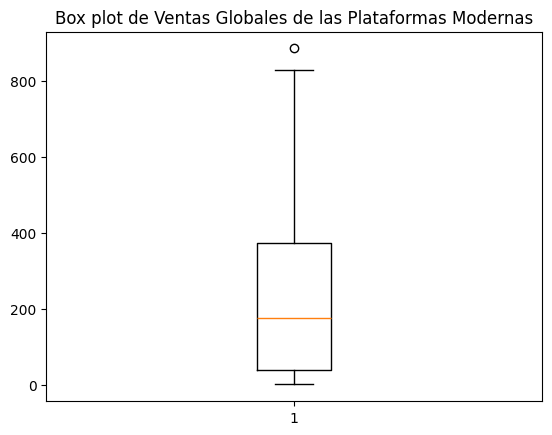

In [70]:
total_global = groupby_lider_platform['total_sales']

plt.boxplot(total_global)
plt.title('Box plot de Ventas Globales de las Plataformas Modernas')
plt.show()